#0. Selecting the right metric

First of all, we have to select the right metric to measure our models because the
choice of a wrong metric can mean choosing the wrong algorithm.
In this case, the company told us that the most critical type of error is do not stop the
machine and have a failure, therefore as we are predicting a class label, the positive
class is more important and the false negative are most costly, we select the
F2-Measure to measure our models.
In addition, to calculate the F2-Measure, we use the micro-average. This is
preferable in a class imbalance problem because it uses true positives, false
positives, and false negatives of the system to get the statistics.

# 1. Selcting the ML technique

To select the Machine Learning technique, we have to test both techniques and see
which have a better f2-score.

**We import required libraries for NB and RF**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

**We import the dataset**

In [ ]:
# Let's import the test and train csv files from its original location
!wget -cq https://www.dropbox.com/s/osvz08qpf0fsp86/machine_failure_detection_test.csv
!wget -cq https://www.dropbox.com/s/ewrb9vmwkqpd8yy/machine_failure_detection_train.csv

# Let's see the contents in our drive folder where the project is
!ls -la 

total 288
drwxr-xr-x 1 root root   4096 Apr 10 06:32 .
drwxr-xr-x 1 root root   4096 Apr 10 06:31 ..
drwxr-xr-x 4 root root   4096 Mar 23 14:21 .config
-rw-r--r-- 1 root root  68800 Apr 10 06:32 machine_failure_detection_test.csv
-rw-r--r-- 1 root root 206291 Apr 10 06:32 machine_failure_detection_train.csv
drwxr-xr-x 1 root root   4096 Mar 23 14:22 sample_data


In [ ]:
dataTest = pd.read_csv("machine_failure_detection_test.csv")
dataTrain = pd.read_csv("machine_failure_detection_train.csv")

dataTrain.head(10)

,Internal machine temperature,External machine temperature,MegaHertz,Angular moment,Longest work period,Failure
0,301.3,310.1,1525,37.8,199,0
1,296.5,307.2,1481,38.2,160,0
2,299.5,309.3,1520,42.3,149,0
3,300.4,309.6,1432,44.7,192,0
4,298.3,309.1,1417,60.5,143,0
5,301.5,310.6,1381,50.7,206,0
6,300.7,310.6,1520,45.9,146,0
7,298.2,307.6,1492,37.2,178,0
8,303.4,311.8,1564,35.9,171,0
9,303.5,312.9,1501,44.0,128,0


trainning_data = pd.read_csv("machine_failure_detection_test.csv", names = column_names)
trainning_data.head(10)

In [ ]:
column_names = ["Internal machine temperature"
                , "External machine temperature"
                , "MegaHertz"
                , "Angular moment"
                , "Longest work period"
                , "Failure"]

dataTrain.describe()

,Internal machine temperature,External machine temperature,MegaHertz,Angular moment,Longest work period,Failure
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,300.026333,310.021453,1537.833200,40.033520,108.310933,0.032933
std,1.986639,1.470307,178.525338,9.935815,63.779393,0.178474
min,295.300000,305.700000,1181.000000,3.800000,0.000000,0.000000
25%,298.400000,308.900000,1423.000000,33.400000,53.000000,0.000000
50%,300.100000,310.100000,1502.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1609.000000,46.800000,163.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000


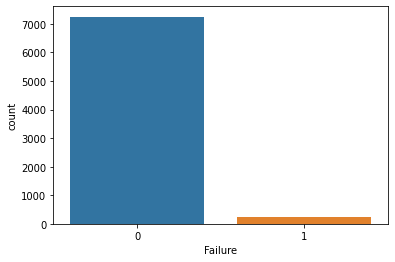

In [ ]:
sns.countplot(x="Failure", data=dataTrain) #Seeing that we have an imbalance problem

0 -> The machine will not fail




1 -> The machine will fail

In [ ]:
#Checking for null values
dataTrain.isnull().sum()

Internal machine temperature    0
External machine temperature    0
MegaHertz                       0
Angular moment                  0
Longest work period             0
Failure                         0
dtype: int64

**Correlation**

In [ ]:
#Showing the data correlation values
dataTrain.corr()

,Internal machine temperature,External machine temperature,MegaHertz,Angular moment,Longest work period,Failure
Internal machine temperature,1.000000,0.873404,0.025574,-0.019857,0.018263,0.084546
External machine temperature,0.873404,1.000000,0.020247,-0.016381,0.014928,0.036996
MegaHertz,0.025574,0.020247,1.000000,-0.874760,0.004547,-0.040303
Angular moment,-0.019857,-0.016381,-0.874760,1.000000,-0.009701,0.190468
Longest work period,0.018263,0.014928,0.004547,-0.009701,1.000000,0.105343
Failure,0.084546,0.036996,-0.040303,0.190468,0.105343,1.000000


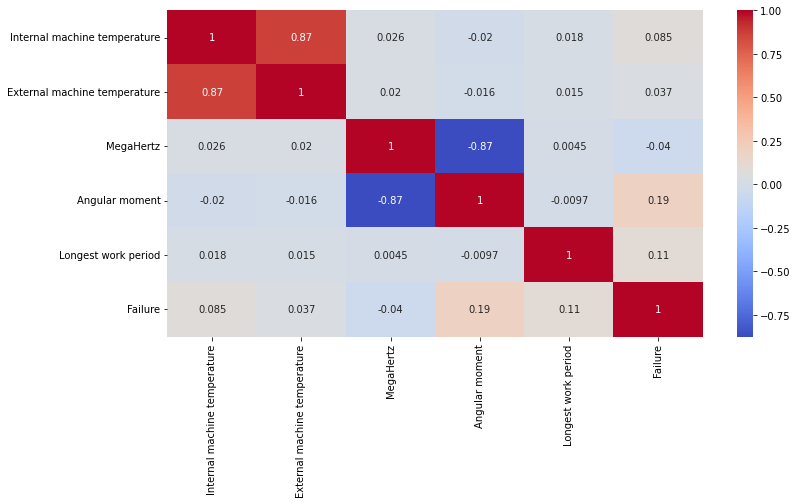

In [ ]:
#Showing the data correlation graph
plt.figure(figsize=(12,6))
sns.heatmap(dataTrain.corr(),cmap='coolwarm', annot=True)

We can see a big correlation between 'External machine temperature' with 'Internal machine temperature', and 'MegaHerz' with 'Angular moment'.
But I try to remove the two features, and one of them and I have obteined worse results(So let's go with all features)

In [ ]:
#Comments because (after many try) it work better with all features
    #dataTrain = dataTrain.drop('External machine temperature',axis=1)
    #dataTrain = dataTrain.drop('Angular moment',axis=1)
    #plt.figure(figsize=(12,6))
    #sns.heatmap(dataTrain.corr(),cmap='coolwarm', annot=True)

**Näive Bayes(80-20)**

In [ ]:
X = dataTrain.drop('Failure',axis=1) # X = dataTrain without Failure column
y = dataTrain.Failure                # y = Only the Failure column of dataTrain

#Dividing the training data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=int(time.time()), shuffle = True)

In [ ]:
gnb = GaussianNB()
#Trainning
gnb.fit(X_train,y_train)    

GaussianNB()

In [ ]:
#Predicting
y_pred = gnb.predict(X_test)

In [ ]:
# f2_score
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, average='micro', beta=2)

0.9720000000000001

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # Y_test = X_test['Failure']

array([[1443,   15],
       [  27,   15]])

Not a very high f2-score, and the most important aspect is that we have a lot of false negatives(27), so let’s try with Random Forest.

**Random Forest(80-20)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

#Putting an accurate range of values(after many combinations to get the best hyperparameters) for after get the recommend values using best_params_ method
params_rf = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(6,9),
    'n_estimators' : [120, 140, 160],
    'max_features' : [0.7, 0.8, 0.9],
    'random_state' : [2]
}

rf = RandomForestClassifier(oob_score=True) #out-of-bag error gives us better accuracy estimation in RF
grid = GridSearchCV(rf, param_grid=params_rf, cv=5, verbose=2, n_jobs=-1, scoring=ftwo_scorer)

#Trainning
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 9),
                         'max_features': [0.7, 0.8, 0.9],
                         'n_estimators': [120, 140, 160], 'random_state': [2]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [ ]:
y_pred = grid.predict(X_test)

grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'n_estimators': 120,
 'random_state': 2}

Saving the hyperparameters for the final model

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # Y_test = X_test['Failure']

array([[1450,    2],
       [  18,   30]])

In [ ]:
print("f2-score\n")
fbeta_score(y_test, y_pred, average='micro', beta=2)

f2-score



0.9866666666666666

Using Random Forest we get a better f2-score and less false negatives than Näive
Bayes. Furthermore we are going to use Cross-Validation for both techniques and
see the f2-Score:

# 2. Cross-Validation to select model

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

column_features = column_names.copy()
column_features.remove("Failure") # column_features only with features and without value to predict

data_input = dataTrain[column_features] # Feature vectors
data_output = dataTrain['Failure'] # The class/column to predict

models = [GaussianNB(), RandomForestClassifier()] 
names = ["Naive Bayes", "Random Forest"]
for model, name in zip(models, names):
    print(f'\n\n{name}')
    start = time.time()
    print('F2-Score')
    print(cross_val_score(model, data_input, data_output, scoring=ftwo_scorer, cv=10).mean())
    print('Time: ' + str(time.time() - start))



Naive Bayes
F2-Score
0.2244288876056059
Time: 0.1427922248840332


Random Forest
F2-Score
0.6643184668835358
Time: 8.842230319976807


Much better the Random Forest technique for this problem

# 3. Trainning our Random Forest model with all data of train data file and testing with all data of test data file

In [ ]:
dataTest.head(10)

,Internal machine temperature,External machine temperature,MegaHertz,Angular moment,Longest work period,Failure
0,301.9,310.7,1472,47.0,73,0
1,300.2,309.6,1442,49.2,61,0
2,302.4,312.1,1492,47.7,7,0
3,300.9,310.8,1402,48.1,22,0
4,300.8,312.3,1435,44.8,134,0
5,303.6,312.6,1498,40.2,155,0
6,298.0,309.5,1496,45.8,46,0
7,297.6,308.5,1552,40.9,90,0
8,298.3,307.7,1439,43.8,111,0
9,298.2,308.1,1622,34.9,67,0


In [ ]:
dataTest.describe()

,Internal machine temperature,External machine temperature,MegaHertz,Angular moment,Longest work period,Failure
count,2500.000000,2500.00000,2500.000000,2500.000000,2500.00000,2500.000000
mean,299.940720,309.95788,1541.604800,39.847080,106.87120,0.036800
std,2.039629,1.52261,181.547972,10.068342,63.27734,0.188308
min,295.300000,305.70000,1168.000000,4.200000,0.00000,0.000000
25%,298.200000,308.70000,1424.750000,32.700000,52.00000,0.000000
50%,299.900000,310.00000,1507.000000,40.000000,106.00000,0.000000
75%,301.500000,311.00000,1618.000000,46.625000,161.00000,0.000000
max,304.500000,313.80000,2874.000000,72.800000,244.00000,1.000000


In [ ]:
#Checking for null values of test file
dataTest.isnull().sum()

Internal machine temperature    0
External machine temperature    0
MegaHertz                       0
Angular moment                  0
Longest work period             0
Failure                         0
dtype: int64

In [ ]:
#Showing the data correlation values of test file
dataTest.corr()

,Internal machine temperature,External machine temperature,MegaHertz,Angular moment,Longest work period,Failure
Internal machine temperature,1.000000,0.883599,0.015000,0.003163,0.000161,0.077780
External machine temperature,0.883599,1.000000,0.017180,-0.008018,0.008588,0.033740
MegaHertz,0.015000,0.017180,1.000000,-0.875775,-0.012282,-0.055408
Angular moment,0.003163,-0.008018,-0.875775,1.000000,0.016314,0.194169
Longest work period,0.000161,0.008588,-0.012282,0.016314,1.000000,0.106284
Failure,0.077780,0.033740,-0.055408,0.194169,0.106284,1.000000


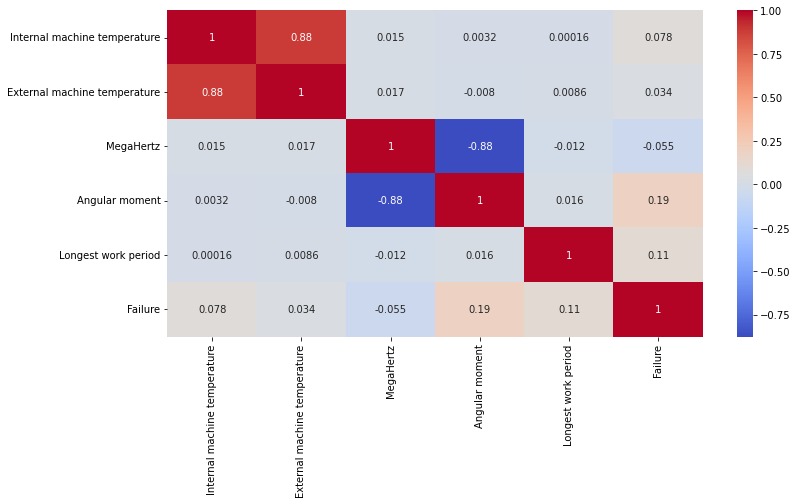

In [ ]:
#Showing the data correlation graph of test file
plt.figure(figsize=(12,6))
sns.heatmap(dataTest.corr(),cmap='coolwarm', annot=True)

In [ ]:
#dataTest = dataTest.drop('External machine temperature',axis=1)
#dataTest = dataTest.drop('Angular moment',axis=1)
#plt.figure(figsize=(12,6))
#sns.heatmap(dataTest.corr(),cmap='coolwarm', annot=True)

Putting the hyperparameters that we obtain before to train with all data our final model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

params_rf = {
    'criterion' : ['entropy'],
    'max_depth' : [8],
    'n_estimators' : [120],
    'max_features' : [0.8],
    'random_state' : [2]
}

rf = RandomForestClassifier(oob_score=True) #out-of-bag error gives us better accuracy estimation in RF
grid = GridSearchCV(rf, param_grid=params_rf, cv=10, verbose=2, n_jobs=-1, scoring=ftwo_scorer)

X = dataTrain.drop('Failure',axis=1) #All train data without Failure column
y = dataTrain.Failure                #All Failure values of train data

grid.fit(X, y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [8],
                         'max_features': [0.8], 'n_estimators': [120],
                         'random_state': [2]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [ ]:
X_test = dataTest.drop('Failure',axis=1) #X_test = All test data without Failure column
y_test = dataTest.Failure                #y_test = All Failure values of test data

#Predicting
y_pred = grid.predict(X_test)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # Y_test = X_test['Failure']

array([[2397,   11],
       [  31,   61]])

In [ ]:
grid.best_score_   # Accuracy by default

0.6884762399938238

In [ ]:
print("f2-score")
fbeta_score(y_test, y_pred, average=None, beta=2)

f2-score


array([0.99378109, 0.69318182])

Predicting with 99.38% of success when a machine is not going to fail

---

Predicting with 69.32% of success when a machine is going to fail

# Extra: Balancing the supervised training

In [ ]:
!pip install imblearn

Balancing data

In [ ]:
from imblearn.combine import SMOTETomek
import collections
import random

counter = collections.Counter(y)
print('Before', counter)
smt = SMOTETomek(random_state=42)

X_balanced, y_balanced = smt.fit_resample(X, y)
counter = collections.Counter(y_balanced)
print('After', counter)

balanced_dataTrain = X_balanced
balanced_dataTrain['Failure'] = y_balanced

#Data shuffle
balanced_dataTrain = balanced_dataTrain.sample(frac = 1)
X_balanced = balanced_dataTrain.drop('Failure',axis=1)
y_balanced = balanced_dataTrain.Failure

Before Counter({0: 7253, 1: 247})
After Counter({0: 7185, 1: 7185})


8574    1
8739    1
768     0
7860    1
2318    0
Name: Failure, dtype: int64

Obtaining the new model using balanced data and trainning

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

params_rf = {
    'criterion' : ['entropy'],
    'max_depth' : [8],
    'n_estimators' : [120],
    'max_features' : [0.8],
    'random_state' : [2]
}

rf = RandomForestClassifier(oob_score=True)
model_grid = GridSearchCV(rf, param_grid = params_rf, cv=5, verbose=2, n_jobs=-1, scoring=ftwo_scorer)
model_grid.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [8],
                         'max_features': [0.8], 'n_estimators': [120],
                         'random_state': [2]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [ ]:
X_test = dataTest.drop('Failure',axis=1)
y_test = dataTest.Failure

y_pred = model_grid.predict(X_test)
fbeta_score(y_test, y_pred, average=None, beta=2.0)

array([0.9519812 , 0.68027211])

In [ ]:
myconfusion = confusion_matrix(y_test, y_pred)
myconfusion

array([[2268,  140],
       [  12,   80]])